# Soal 13

1. [Buat vector x](#1)
2. [Buat vector eps](#2)
3. [Buat vector y menggunakan vektor x dan eps](#3)
4. [Buat scatterplotnya](#4)
5. [Prediksi nilai y dengan menggunakan nilai x dan least square linear model](#5)
6. [Buat scatterplot model nomor 5](#6)
7. [Buat model dengan prediktor x dan $x^2$](#7)
8. [Ulangi soal 1-6 sehingga noise di model berkurang](#8)
9. [Ulangi soal 1-6 sehingga noise di model bertambah](#9)
10. [Tentukan nilai confidence interval $\beta_0 dan \beta_1$ di model original, noisy data, dan less noisy data](#10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

%matplotlib inline
np.random.seed(1)

## 1

In [2]:
x = np.random.normal(size=100)

perintah untuk menunjukkan grafik
```python
fig, ax = plt.subplots()
sns.despine(left=True)
sns.distplot(x, hist=False, rug=True, color="r", ax=ax);
```

[kembali ke atas](#Soal-13)

## 2

In [3]:
eps = np.random.normal(scale=0.25, size=100)

In [4]:
eps

array([-0.11178214,  0.30612693,  0.10087291,  0.14839463, -0.27372796,
        0.04234561,  0.18513911, -0.23842515, -0.06655463,  0.00815364,
       -0.34327933,  0.07878985,  0.21154016, -0.21487899,  0.08763649,
       -0.32807085, -0.00967388, -0.40394309,  0.28035443,  0.10222513,
       -0.00615424, -0.1937904 ,  0.31843898,  0.49177544, -0.46449547,
        0.30904101,  0.40691269,  0.08450292, -0.29981701,  0.21583633,
       -0.04523008, -0.15098016, -0.30751453,  0.13763437,  0.19820172,
       -0.15588268,  0.13014408, -0.28608535,  0.20046526,  0.01164182,
       -0.04664244, -0.02543647,  0.21722154,  0.18760291,  0.13236633,
        0.0344253 ,  0.01945528,  0.15459507,  0.05812364,  0.17063785,
       -0.07752919, -0.60870944,  0.25970615,  0.54674491,  0.11034111,
       -0.02503881, -0.03411119, -0.02976355,  0.00435235, -0.28050468,
       -0.12927361, -0.24925671,  0.06219979, -0.07416029,  0.12380283,
       -0.04367579,  0.2465838 ,  0.05338348,  0.54767493, -0.47

[kembali ke atas](#Soal-13)

## 3

In [5]:
y = -1 + 0.5 * x + eps

In [6]:
len(y)

100

nilai $\beta_0$ dan $\beta_1$ ialah -1 dan 0.5

[kembali ke atas](#Soal-13)

## 4

In [7]:
df = pd.DataFrame({
    'x': x,
    'y': y
})

In [8]:
df.head()

,x,y
0,1.624345,-0.299609
1,-0.611756,-0.999751
2,-0.528172,-1.163213
3,-1.072969,-1.388090
4,0.865408,-0.841024


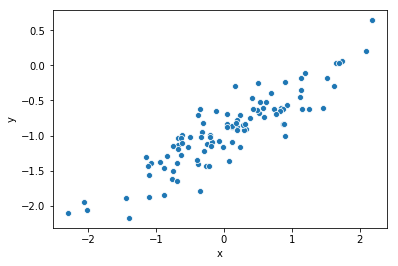

In [9]:
sns.scatterplot(x='x', y='y', data=df);

Ada hubungan linear antara x dan y

[kembali ke atas](#Soal-13)

## 5

In [10]:
model_ori = smf.ols('y ~ x', df).fit()
model_ori.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           5.39e-36
Time:                        10:18:11   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model memiliki nilai F-statistic yang besar dan nilai p-value yang mendekati nol. Sehingga null hypothesis dapat kita tolak 

[kembali ke atas](#Soal-13)

## 6

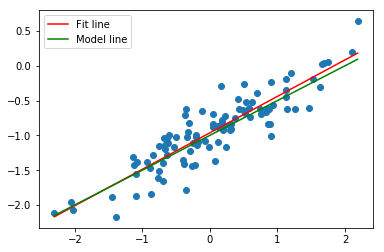

In [11]:
linear = LinearRegression(fit_intercept=True)
model = linear.fit(x[:, np.newaxis], y)
plt.scatter(df['x'], df['y'])

x_fit = np.linspace(df.x.min(), df.x.max(), 100)
y_fit = model.predict(x_fit[:, np.newaxis])
fit, = plt.plot(x_fit, y_fit, color='r');

x_pop = np.linspace(df.x.min(), df.x.max(), 100)
y_pop = -1 + 0.5 * x_pop
pop, = plt.plot(x_pop, y_pop, color='g');
plt.legend([fit, pop],['Fit line','Model line'])

[kembali ke atas](#Soal-13)

## 7

In [12]:
lr = smf.ols('y ~ x + I(x**2)', df).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           1.32e-34
Time:                        10:18:11   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x              0.5234      0.027     19.582      0.000       0.470       0.576
I(x ** 2)      0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

nilai p-value $x^2$ lebih besar dari 0.05. 

$x^2$ dan y tidak memiliki hubungan

[kembali ke atas](#Soal-13)

## 8

/home/uulwake/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


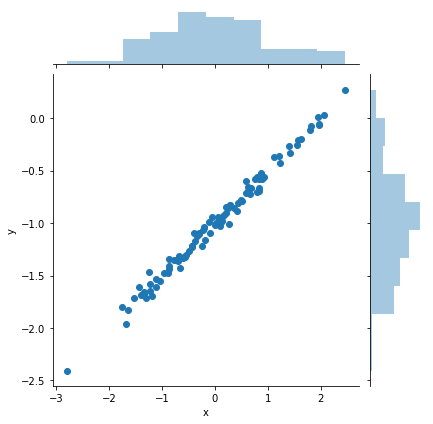

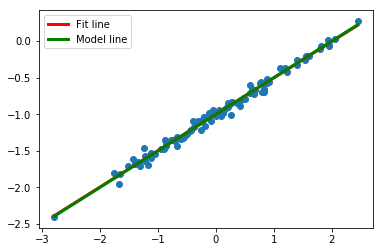

In [13]:
x = np.random.normal(size=100)
eps = np.random.normal(scale = .05, size=100)
y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis],y)

plt.subplots()
plt.scatter(df.x, df.y);


xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color='r', linewidth=3);

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color='g', linewidth=3);
plt.legend([fit, pop],['Fit line','Model line'])

In [14]:
model_less_noise = smf.ols('y ~ x', df).fit()
model_less_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8662.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           1.97e-97
Time:                        10:18:12   Log-Likelihood:                 151.58
No. Observations:                 100   AIC:                            -299.2
Df Residuals:                      98   BIC:                            -293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0010      0.005   -186.443      0.000      -1.012      -0.990
x              0.4972      0.005     93.071      0.000       0.487       0.508
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Jika noise dikurangi di data, model menjadi lebih bagus. Confidence Interval dan $R^2$nya memiliki nilai yang tinggi

[kembali ke atas](#Soal-13)

## 9

/home/uulwake/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


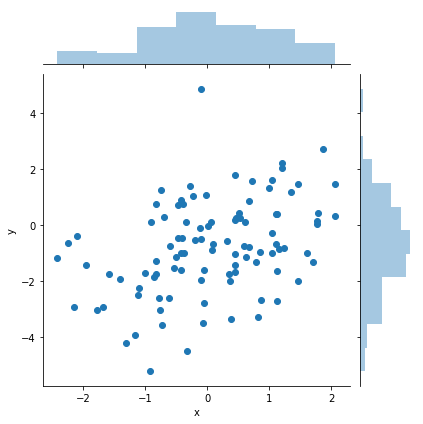

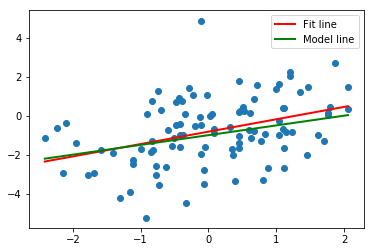

In [15]:
x = np.random.normal(size=100)
eps = np.random.normal(scale = 1.5, size=100)
y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis],y)

plt.subplots()
plt.scatter(df.x, df.y);


xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color='r', linewidth=2);

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color='g', linewidth=2);
plt.legend([fit, pop],['Fit line','Model line'])

In [16]:
model_more_noise = smf.ols('y ~ x', df).fit()
model_more_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     17.49
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           6.29e-05
Time:                        10:18:12   Log-Likelihood:                -186.21
No. Observations:                 100   AIC:                             376.4
Df Residuals:                      98   BIC:                             381.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8203      0.158     -5.204      0.000      -1.133      -0.507
x              0.6354      0.152      4.182      0.000       0.334       0.937
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.566
Skew:                           0.192   Prob(JB):                        0.168
Kurtosis:                       3.842   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Data yang memiliki noise yang besar akan membuat model menjadi jelek. Bisa dilihat dari nilai $R^2$ yang sangat rendah. Nilai Confidence Interval juga sangat tinggi.

[kembali ke atas](#Soal-13)

## 10

In [17]:
model_ori.conf_int()

,0,1
Intercept,-1.009870,-0.916623
x,0.471307,0.576407


In [18]:
model_less_noise.conf_int()

,0,1
Intercept,-1.011645,-0.990336
x,0.486611,0.507814


In [19]:
model_more_noise.conf_int()

,0,1
Intercept,-1.133180,-0.507482
x,0.333923,0.936974


model yang memiliki noise data paling sedikit, memiliki confidence interval yang lebih dekat. Semakin banyak noise di data, semakin besar pula jarak Confidence Intervalnya

[kembali ke atas](#Soal-13)